In [1]:
import pandas as pd
df = pd.read_excel('kanopus.xlsb', engine='pyxlsb')

In [2]:
channels = df['l']
blue = df['М7']
green = df['М8']
red = df['М9']
nir = df['М10']

Спектральная чувствительность, Канопус В-ИК (МСС)

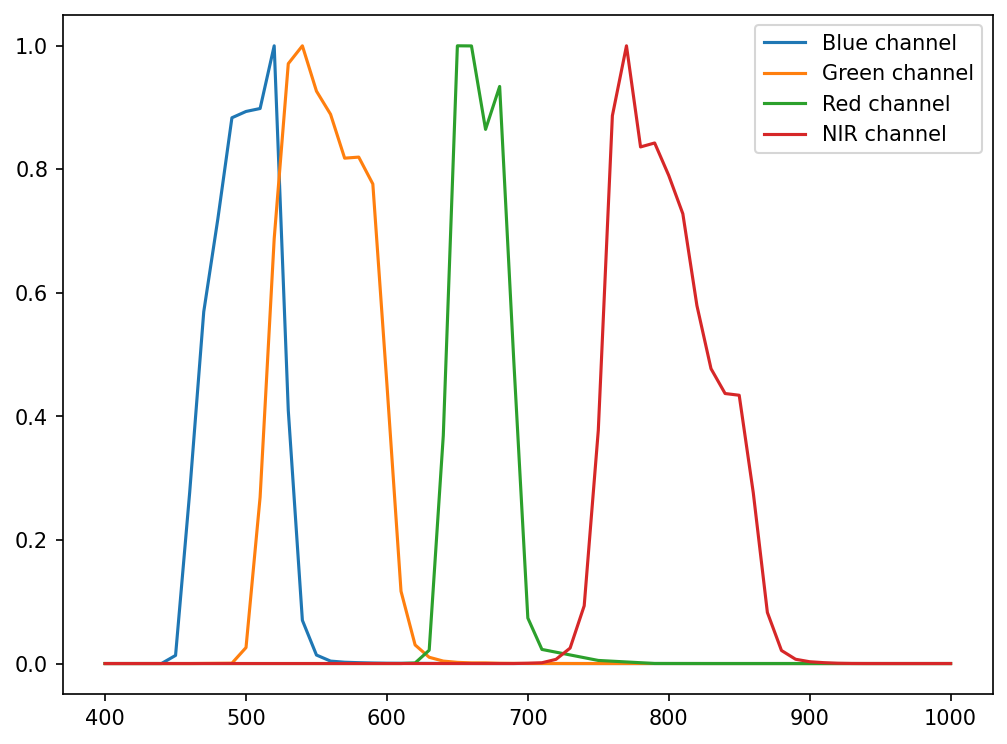

In [3]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(8, 6), dpi=150)

ax.plot(channels, blue, label='Blue channel')
ax.plot(channels, green, label='Green channel')
ax.plot(channels, red, label='Red channel')
ax.plot(channels, nir, label='NIR channel')

ax.legend()

In [4]:
import numpy as np
from scipy import integrate

In [5]:
s_blue = integrate.simpson(blue, channels)
s_green = integrate.simpson(green, channels)
s_red = integrate.simpson(red, channels)
s_nir = integrate.simpson(nir, channels)

print(s_blue, s_green, s_red, s_nir)

56.990986666666664 77.96862999999999 48.364169200000006 79.23571066666668


In [6]:
i = 1

s_nir_left = integrate.simpson(nir[:i])
s_nir_right = integrate.simpson(nir[i:])

min = np.fabs(s_nir_left - s_nir_right)

for k in range(1, len(nir)):
    s_nir_left = integrate.simpson(nir[:k])
    s_nir_right = integrate.simpson(nir[k:])

    if min > np.fabs(s_nir_left - s_nir_right):
        min = np.fabs(s_nir_left - s_nir_right)
        i = k



print(min)
print(i)

0.19881593333333392
40


Центрально волновое число для ближнего ИК, Канопус В-ИК (МСС)

In [7]:
channels[i]

800

Спектральный диапазон ближнего ИК, Канопус В-ИК (МСС)

In [8]:
cn = []

for i, n in enumerate(nir):
    if(n > 0.1):
        cn.append(i)

print(channels[cn])

35    750
36    760
37    770
38    780
39    790
40    800
41    810
42    820
43    830
44    840
45    850
46    860
Name: l, dtype: int64
